In [2]:
import pandas as pd
import numpy as np

# data 시각화
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# 나무 구조 생성 및 저장
from sklearn.tree import export_graphviz
import graphviz

# Scale 변환
from sklearn.preprocessing import StandardScaler

# data split
from sklearn.model_selection import train_test_split

# Logistic Regression
from statsmodels.api import Logit
# Decision Tree
from sklearn.tree import DecisionTreeClassifier
# Random Forest
from sklearn.ensemble import RandomForestClassifier
# Gradient Boosting
from sklearn.ensemble import GradientBoostingClassifier
# PCA
from sklearn.decomposition import PCA


# 평가 함수
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import accuracy_score, f1_score
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import GridSearchCV

# 경고문 제거
import warnings
warnings.filterwarnings('ignore')

# 한글 폰트 설정
# !ls -l /usr/share/fonts/truetype/
!rm -rf ~/.cache/matplotlib/*
!fc-cache -fv

import matplotlib    
import matplotlib.font_manager

[f.name for f in matplotlib.font_manager.fontManager.ttflist if 'Nanum' in f.name]

# 유니코드 깨짐현상 해결
mpl.rcParams['axes.unicode_minus'] = False

# 나눔고딕 폰트 전체 적용
plt.rcParams["font.family"] = 'NanumMyeongjo'

/usr/share/fonts: caching, new cache contents: 0 fonts, 6 dirs
/usr/share/fonts/X11: caching, new cache contents: 0 fonts, 4 dirs
/usr/share/fonts/X11/Type1: caching, new cache contents: 8 fonts, 0 dirs
/usr/share/fonts/X11/encodings: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/X11/encodings/large: caching, new cache contents: 0 fonts, 0 dirs
/usr/share/fonts/X11/misc: caching, new cache contents: 89 fonts, 0 dirs
/usr/share/fonts/X11/util: caching, new cache contents: 0 fonts, 0 dirs
/usr/share/fonts/cMap: caching, new cache contents: 0 fonts, 0 dirs
/usr/share/fonts/cmap: caching, new cache contents: 0 fonts, 5 dirs
/usr/share/fonts/cmap/adobe-cns1: caching, new cache contents: 0 fonts, 0 dirs
/usr/share/fonts/cmap/adobe-gb1: caching, new cache contents: 0 fonts, 0 dirs
/usr/share/fonts/cmap/adobe-japan1: caching, new cache contents: 0 fonts, 0 dirs
/usr/share/fonts/cmap/adobe-japan2: caching, new cache contents: 0 fonts, 0 dirs
/usr/share/fonts/cmap/adobe-korea1: c

fc-cache: succeeded


# Data 분석의 목적

환자들의 특정 부위에 존재하는 세포들의 반경, 질감, 둘레 등의 지표들을 수집하고,  
해당 세포들에서 지표값의 평균값, 표준오차 등을 이용하여 특정 부위에 존재하는 종양이 양성인지 판별하게 된다.  

이때, 다양한 지표들 중에서 어떤 인자들이 양성 종양과 관련이 있는 지 분석하고  
핵심 인자들을 이용하여 제작한 알고리즘을 통해 양성종양과 음성종양을 구분하는 것이 이번 분석의 목적이다.

|환자의 몸속에 존재하는 세포에 대한 정보||
|:---|:---|
|변수|설명|
|diagnosis|양성 여부|
|radius|반경(중심에서 외벽까지 거리들의 평균값|
|texture|질감(해당 정보는 광도의 정보를 함께 전달할 수 있다.|
|perimeter|둘레|
|area|면적|
|smoothness|매끄러움(반경길의의 국소적 변화|
|compactness|조그만 정도(perimeter^2/area - 1)|
|concavity|오목함(윤곽의 오목한 부분의 정도|
|points|오목한 점의 수|
|symmetry|대칭|
|dimension|프렉탈 차원|
|mean|평균값|
|se|표준오차|
|worst|각 세포별 구분들에서 제일 큰 3개의 값의 평균값|

# Summary

## Data 불러오기 및 구성  

1. 결측치를 확인한 결과, 존재하지 않았다.


2. 분석을 위해서 양성을 1, 음성을 0으로 변경하였다.


3. 목표변수 중 **양성지표의 비율은 33.3%**로 일반적인 경우, 불균형 data라고 인식되지 않지만 이번 분석은 의료용 데이터의 분석이므로  

    좀 더 높은 **일반성을 나타내는 모델**을 만들기 위해 SMOTE 처리를 실시하였다. **처리 후 양성지표의 비율은 50%**로 증가하였다.
    
## Model 생성(Vital Feature 확인)

1. Hyper Parameter를 설정하지 않은 Decision Tree의 경우 **Train Accuracy는 100%**로 과적합되어 있었고, **Test Accuracy는 93.0%**를 나타내었다.


    모델의 성능 및 일반화를 향상시키기 위해서 Parameter를 조정하였다. 
    
|Hyper Parameter|Value|Reason|
|:---|:---|:-----------------|
|Max Depth|5|Train과 Test의 성능차이가 적어 일반성이 높고, 추후 분류작업 시에 많은 data가 들어와도 과소적합 되지 않도록 여유있게 설정|
|min_samples_Split|60|Train과 Test의 성능차이가 적어 일반성이 높고, Test Accuracy가 Sample의 수가 60이상일 경우 증가하지 않았기 때문|
|min_samples_Leaf|설정하지 않았음|Leaf의 sample수를 변화시켜도 Test Accuracyr가 변하지 않고 0.898로 일정했기 때문|

    
    모델의 성능을 평가하기위해 precision, recall, F1 Score를 분석하였다.  
    
    양성지표(1)의 Precision은 0.90(양성지표라고 분류한 data중, 실제로 양성지표인 비율),  
    
    Recall은 0.8(실제로 양성지표들 중에서 양성지표라고 예측한 data의 비율),  
    
    F1 Score가 0.847로 높게 측정되어 분석력이 높은 model이 제작되었다.
  

2. Random Forest의 경우,  Hyper Parameter를 설정하지 않았을 때는 **Test Accuracy가 93%**로 측정되었다.     

    최종 HyperParameter를 변경한 결과, 양성지표(1)의 Precision은 0.884, recall은 0.884, F1 Score는 0.864로 측정되었다.  
    
    Decision Tree보다는 precision은 감소하였지만, recall값이 증가하여 양성지표인 data를 더 잘 분류할 수 있는 model이라고 판단하였다.
    
|Hyper Parameter|Value|Reason|
|:---|:---|:-----------------|
|Tree 수의 변경|150|Test Accuracy가 Tree 수 150~170 사이에서 가장 높기 때문|
|Max Depth|6|Train과 Test의 Accuracy는 계속 증가하다가, Depth가 6이상에서 Train Data는 과적합, Test Data는 0.953으로 일정하게 유지|
|min_samples_Split|60|Model의 성능과 일반화를 모두 고려|
|min_samples_Leaf|18|최종 model의 일반성 및 성능으로 모두 고려|

## 결론 도출

1. Decision Tree의 경우 worst_perimeter와 mean_concave_points의 영향력이 가장 높았다.  

    최종 모델은 worst_perimeter와 mean_concave_points의 지표를 이용하여 완성하였다. 
    
    최종 모델의 confusion matrix와 정확도는 다음과 같다.
    
|최종모델의 정확도(F1 Score)||0.847|
|:---:|:---:|:---:|
|Confusion Matrix|0|1|
|0|79|4|
|1|9|36|


2. RandomForest의 경우 종양의 크기를 설정하는 지표들인 Area, perimeter, radius에서 worst(가장 큰 3개의 평균값)와 mean의 영향력이 높았고,  

    윤곽의 오목한 부분을 나타내는 concavity의 Worst와 Mean의 영향도 또한 높게 나타났다.    
    
    최종모델은 
    
|최종모델의 정확도(F1 Score)||0.860|
|:---:|:---:|:---:|
|Confusion Matrix|0|1|
|0|79|4|
|1|8|37|


3. 양성종양을 식별하는 것에 중요한 역할을 하는 지표는 세포의 크기와 세포막의 매끈한 정도로 측정되었다. 

# 분석에 사용된 코드

## 데이터 불러오기 및 구성

In [3]:
df_raw = pd.read_csv('/home/piai/Bigdata 실습과제/2. Big Data 분석/유방암.csv', encoding = 'euc-kr')
df_raw.head()

,diagnosis,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,mean_compactness,mean_concavity,mean_concave_points,mean_symmetry,...,worst_radius,worst_texture,worst_perimeter,worst_area,worst_smoothness,worst_compactness,worst_concavity,worst_concave_points,worst_symmetry,worst_fractal_dimension
0,음성,15.12,16.68,98.78,716.6,0.08876,0.09588,0.07550,0.04079,0.1594,...,17.77,20.24,117.70,989.5,0.14910,0.3331,0.3327,0.12520,0.3415,0.09740
1,양성,10.80,9.71,68.77,357.6,0.09594,0.05736,0.02531,0.01698,0.1381,...,11.60,12.02,73.66,414.0,0.14360,0.1257,0.1047,0.04603,0.2090,0.07699
2,음성,18.31,18.58,118.60,1041.0,0.08588,0.08468,0.08169,0.05814,0.1621,...,21.31,26.36,139.20,1410.0,0.12340,0.2445,0.3538,0.15710,0.3206,0.06938
3,양성,14.92,14.93,96.45,686.9,0.08098,0.08549,0.05539,0.03221,0.1687,...,17.18,18.22,112.00,906.6,0.10650,0.2791,0.3151,0.11470,0.2688,0.08273
4,양성,12.89,13.12,81.89,515.9,0.06955,0.03729,0.02260,0.01171,0.1337,...,13.62,15.54,87.40,577.0,0.09616,0.1147,0.1186,0.05366,0.2309,0.06915


### 결측치 확인 및 처리

In [4]:
df_raw.isnull().sum(axis = 0)

diagnosis                  0
mean_radius                0
mean_texture               0
mean_perimeter             0
mean_area                  0
mean_smoothness            0
mean_compactness           0
mean_concavity             0
mean_concave_points        0
mean_symmetry              0
mean_fractal_dimension     0
radius_error               0
texture_error              0
perimeter_error            0
area_error                 0
smoothness_error           0
compactness_error          0
concavity_error            0
concave_points_error       0
symmetry_error             0
fractal_dimension_error    0
worst_radius               0
worst_texture              0
worst_perimeter            0
worst_area                 0
worst_smoothness           0
worst_compactness          0
worst_concavity            0
worst_concave_points       0
worst_symmetry             0
worst_fractal_dimension    0
dtype: int64

* Data에 결측치는 존재하지 않았다.

### 목표변수의 변경

In [5]:
# 양성 : 1, 음성 : 0
df_raw = df_raw.replace('양성', 1)
df_raw = df_raw.replace('음성', 0)
df_raw.head()

,diagnosis,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,mean_compactness,mean_concavity,mean_concave_points,mean_symmetry,...,worst_radius,worst_texture,worst_perimeter,worst_area,worst_smoothness,worst_compactness,worst_concavity,worst_concave_points,worst_symmetry,worst_fractal_dimension
0,0,15.12,16.68,98.78,716.6,0.08876,0.09588,0.07550,0.04079,0.1594,...,17.77,20.24,117.70,989.5,0.14910,0.3331,0.3327,0.12520,0.3415,0.09740
1,1,10.80,9.71,68.77,357.6,0.09594,0.05736,0.02531,0.01698,0.1381,...,11.60,12.02,73.66,414.0,0.14360,0.1257,0.1047,0.04603,0.2090,0.07699
2,0,18.31,18.58,118.60,1041.0,0.08588,0.08468,0.08169,0.05814,0.1621,...,21.31,26.36,139.20,1410.0,0.12340,0.2445,0.3538,0.15710,0.3206,0.06938
3,1,14.92,14.93,96.45,686.9,0.08098,0.08549,0.05539,0.03221,0.1687,...,17.18,18.22,112.00,906.6,0.10650,0.2791,0.3151,0.11470,0.2688,0.08273
4,1,12.89,13.12,81.89,515.9,0.06955,0.03729,0.02260,0.01171,0.1337,...,13.62,15.54,87.40,577.0,0.09616,0.1147,0.1186,0.05366,0.2309,0.06915


* 개요

> 전체 Data 수 : 320  
> 양성(1) Data 수 : 108  
> 음성(0) Data 수 : 212  

* 관심을 가지는 변수(양성)의 전체 Data 대비 비율은 33.3% 이다.

* 설명변수 중에서 문자형 변수로, Dummy Data로 변형이 필요한 변수는 존재하지 않았다.

### Data Split 

In [6]:
# Data Split
df_raw_x = df_raw.drop("diagnosis", axis = 1, inplace = False)
df_raw_y = df_raw["diagnosis"]

random = 100

df_train_x, df_test_x, df_train_y, df_test_y = train_test_split(df_raw_x, df_raw_y, test_size = 0.4, random_state = random)

print("Split 전 data size : {0}".format(df_raw_x.shape))
print("Split 후 train data size : {0}".format(df_train_x.shape))
print("Split 후 test data size : {0}".format(df_test_x.shape))

Split 전 data size : (320, 30)
Split 후 train data size : (192, 30)
Split 후 test data size : (128, 30)


### Oversampling : SMOTE

In [7]:
# !pip install imblearn

In [8]:
from collections import Counter

from sklearn.datasets import make_classification

from imblearn.over_sampling import SMOTE 

diagnosis
0            212
1            108
dtype: int64 

diagnosis = 1 비율 diagnosis
False    0.6625
True     0.3375
dtype: float64


<function matplotlib.pyplot.show(close=None, block=None)>

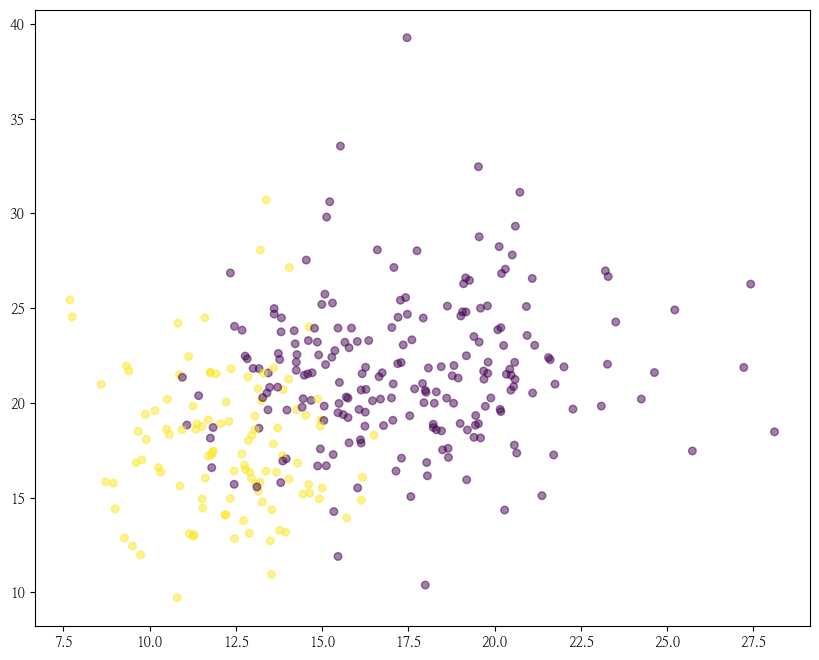

In [9]:
# 목표 변수 빈도 확인
print(df_raw.value_counts(["diagnosis"]), "\n")
print("diagnosis = 1 비율", df_raw.value_counts(df_raw["diagnosis"] == 1)/len(df_raw))
# 목표변수 산점도 확인
plt.figure(figsize=(10,8))
# plt.scatter(df_raw['LOAN'], df_raw["VALUE"], c = df_raw["BAD"], s = 10)
plt.scatter(df_raw['mean_radius'], df_raw["mean_texture"], c = df_raw["diagnosis"], s = 30, alpha = 0.5)
plt.show

In [10]:
# Over Sampling 설정
sm = SMOTE(sampling_strategy = 'auto')
# Over Sampling
x_resampled, y_resampled = sm.fit_resample(df_train_x, df_train_y)
# Result
print('Over Sampling 전:\n', df_train_y.value_counts(),"\n")
print('Over Sampling 후 Train X: {0}'.format(x_resampled.shape))
print('Over Sampling 후 Train Y: {0} \n'.format(y_resampled.shape))
print("Over Sampling 후 '1': {0}".format(sum(y_resampled==1)))
print("Over Sampling 후 '0': {0}".format(sum(y_resampled==0)))

Over Sampling 전:
 0    129
1     63
Name: diagnosis, dtype: int64 

Over Sampling 후 Train X: (258, 30)
Over Sampling 후 Train Y: (258,) 

Over Sampling 후 '1': 129
Over Sampling 후 '0': 129


* SMOTE 이후, 관심을 가지는 변수(양성)의 전체 Data 대비 비율이 50%로 증가하였다.

## Model 생성, 선정 및 성능 평가

### Decision Tree

#### 일반 모델 생성

In [11]:
tree_normal = DecisionTreeClassifier(random_state = random)
tree_normal.fit(df_train_x, df_train_y)

# train 정확도
print("Accuracy on train set : {:.3f}".format(tree_normal.score(df_train_x, df_train_y)))
# test 정확도
print("Accuracy on test set : {:.3f}".format(tree_normal.score(df_test_x, df_test_y)))

Accuracy on train set : 1.000
Accuracy on test set : 0.930


* Model은 현재 Train data에 Overfitting 되어 있다.

#### 파라미터 조정

##### Max Depth

In [12]:
train_acc = []
test_acc = []

para_depth = [depth for depth in range(1,11)]

for v_max_depth in para_depth:
    tree_max_depth = DecisionTreeClassifier(random_state = random, max_depth = v_max_depth)
    tree_max_depth.fit(df_train_x, df_train_y)
    train_acc.append(tree_max_depth.score(df_train_x, df_train_y))
    test_acc.append(tree_max_depth.score(df_test_x, df_test_y))

# 결과 저장
df_acc_max_depth = pd.DataFrame()
df_acc_max_depth["MinSampleLeaf"] = para_depth
df_acc_max_depth["TrainScore"] = train_acc
df_acc_max_depth["TestScore"] = test_acc

In [13]:
df_acc_max_depth.round(3)

,MinSampleLeaf,TrainScore,TestScore
0,1,0.932,0.898
1,2,0.943,0.891
2,3,0.990,0.914
3,4,0.995,0.914
4,5,1.000,0.930
5,6,1.000,0.930
6,7,1.000,0.930
7,8,1.000,0.930
8,9,1.000,0.930
9,10,1.000,0.930


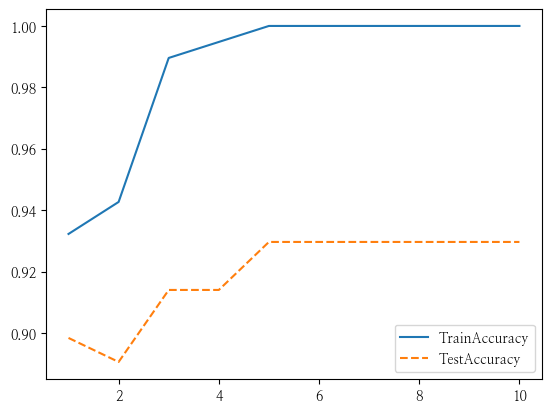

In [14]:
# 그래프
plt.plot(para_depth, train_acc, linestyle = "-", label = "TrainAccuracy")
plt.plot(para_depth, test_acc, linestyle = "--", label = "TestAccuracy")
plt.legend()

In [15]:
# max depth : 4
max_depth = 4
tree_max_depth = DecisionTreeClassifier(random_state = random, max_depth = max_depth)
tree_max_depth.fit(df_train_x, df_train_y)

# 나무구조 시각화(Graphviz)
# v_feature_name = df_train_x.columns
# export_graphviz(tree_max_depth, out_file="tree_max_depth", feature_names = v_feature_name, impurity = True, filled = True)

# with open("tree_leaf.dot") as f:
#     dot_graph = f.read()
# display(graphviz.Source(dot_graph))

DecisionTreeClassifier(max_depth=4, random_state=100)

In [16]:
print("Score_train : {0}".format(tree_max_depth.score(df_train_x, df_train_y)))
print("Score_test : {0}".format(tree_max_depth.score(df_test_x, df_test_y)))

Score_train : 0.9947916666666666
Score_test : 0.9140625


In [17]:
# max depth : 5
max_depth = 5
tree_max_depth = DecisionTreeClassifier(random_state = random, max_depth = max_depth)
tree_max_depth.fit(df_train_x, df_train_y)

# 나무구조 시각화(Graphviz)
# v_feature_name = df_train_x.columns
# export_graphviz(tree_max_depth, out_file="tree_max_depth", feature_names = v_feature_name, impurity = True, filled = True)

# with open("tree_leaf.dot") as f:
#     dot_graph = f.read()
# display(graphviz.Source(dot_graph))

DecisionTreeClassifier(max_depth=5, random_state=100)

In [18]:
print("Score_train : {0}".format(tree_max_depth.score(df_train_x, df_train_y)))
print("Score_test : {0}".format(tree_max_depth.score(df_test_x, df_test_y)))

Score_train : 1.0
Score_test : 0.9296875


* 최대 깊이 설정 : 5
    * 최대 깊이 증가에 따라 모델의 정확도는 증가한다.  
    * Test와 Train의 성능차이가 많이 나지 않는 경우 고려
    * 추후 Model 사용 시, 많은 data가 들어와도 Underfitting 되지 않도록 여유있게 고려

* 모델의 성능 확인

##### Min_Sample_Split

In [19]:
train_acc = []
test_acc = []

para_split = [n_split * 10 for n_split in range(2,11)]

for v_para_split in para_split:
    tree_split = DecisionTreeClassifier(random_state = random, max_depth = max_depth , min_samples_split = v_para_split)
    tree_split.fit(df_train_x, df_train_y)
    train_acc.append(tree_split.score(df_train_x, df_train_y))
    test_acc.append(tree_split.score(df_test_x, df_test_y))

# 결과 저장
df_acc_split = pd.DataFrame()
df_acc_split["MinSampleLeaf"] = para_split
df_acc_split["TrainScore"] = train_acc
df_acc_split["TestScore"] = test_acc

In [20]:
df_acc_split.round(3)

,MinSampleLeaf,TrainScore,TestScore
0,20,0.953,0.891
1,30,0.953,0.891
2,40,0.953,0.891
3,50,0.953,0.891
4,60,0.938,0.898
5,70,0.938,0.898
6,80,0.938,0.898
7,90,0.938,0.898
8,100,0.938,0.898


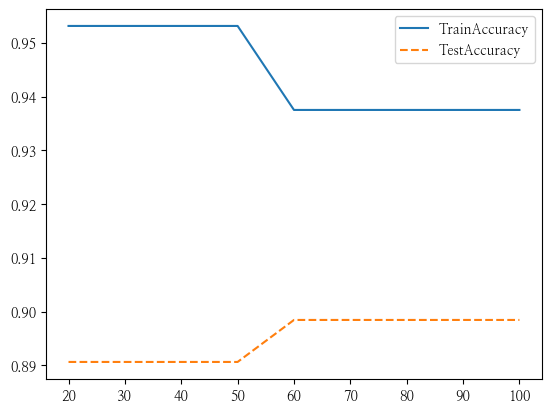

In [21]:
# 그래프
plt.plot(para_split, train_acc, linestyle = "-", label = "TrainAccuracy")
plt.plot(para_split, test_acc, linestyle = "--", label = "TestAccuracy")
plt.legend()

In [22]:
# Min_Sample_Split : 30
n_split = 30
tree_split = DecisionTreeClassifier(random_state = random, max_depth = max_depth, min_samples_split = n_split)
tree_split.fit(df_train_x, df_train_y)

# 나무구조 시각화(Graphviz)
# v_feature_name = df_train_x.columns
# export_graphviz(tree_split, out_file="tree_split", feature_names = v_feature_name, impurity = True, filled = True)

# with open("tree_split.dot") as f:
#     dot_graph = f.read()
# display(graphviz.Source(dot_graph))

DecisionTreeClassifier(max_depth=5, min_samples_split=30, random_state=100)

##### Min_Samples_Leaf 

In [23]:
train_acc = []
test_acc = []

para_leaf = [n_leaf * 2 for n_leaf in range(1,16)]

for v_para_leaf in para_leaf:
    tree_leaf = DecisionTreeClassifier(random_state = random, max_depth = max_depth , 
                                       min_samples_split = n_split, min_samples_leaf = v_para_leaf)
    tree_leaf.fit(df_train_x, df_train_y)
    train_acc.append(tree_leaf.score(df_train_x, df_train_y))
    test_acc.append(tree_leaf.score(df_test_x, df_test_y))

# 결과 저장
df_acc_leaf = pd.DataFrame()
df_acc_leaf["MinSampleLeaf"] = para_leaf
df_acc_leaf["TrainScore"] = train_acc
df_acc_leaf["TestScore"] = test_acc

In [24]:
df_acc_leaf.round(3)

,MinSampleLeaf,TrainScore,TestScore
0,2,0.943,0.891
1,4,0.943,0.891
2,6,0.932,0.883
3,8,0.932,0.898
4,10,0.932,0.898
5,12,0.932,0.898
6,14,0.932,0.898
7,16,0.932,0.898
8,18,0.932,0.898
9,20,0.932,0.898


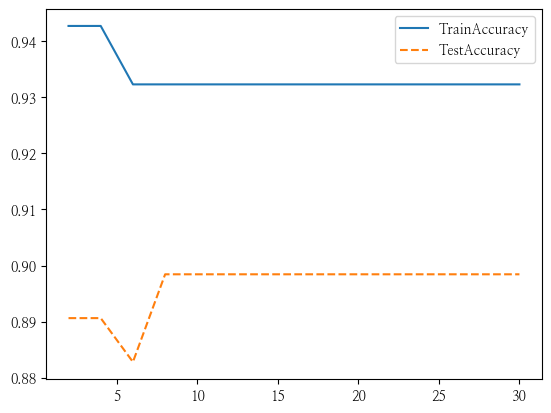

In [25]:
# 그래프
plt.plot(para_leaf, train_acc, linestyle = "-", label = "TrainAccuracy")
plt.plot(para_leaf, test_acc, linestyle = "--", label = "TestAccuracy")
plt.legend()

In [26]:
# Min_Sample_Leaf : 20
n_leaf = 20
tree_leaf = DecisionTreeClassifier(random_state = random, max_depth = max_depth, min_samples_split = n_split, min_samples_leaf = n_leaf)
tree_leaf.fit(df_train_x, df_train_y)

# 나무구조 시각화(Graphviz)
# v_feature_name = df_train_x.columns
# export_graphviz(tree_split, out_file="tree_split", feature_names = v_feature_name, impurity = True, filled = True)

# with open("tree_split.dot") as f:
#     dot_graph = f.read()
# display(graphviz.Source(dot_graph))

DecisionTreeClassifier(max_depth=5, min_samples_leaf=20, min_samples_split=30,
                       random_state=100)

#### Model 선정 및 성능 평가(정확성 및 일반화)

##### Model 선정

In [27]:
tree_final = DecisionTreeClassifier(random_state = 100, min_samples_leaf = n_leaf, 
                                   min_samples_split = n_split, max_depth = max_depth)
tree_final.fit(df_train_x, df_train_y)

DecisionTreeClassifier(max_depth=5, min_samples_leaf=20, min_samples_split=30,
                       random_state=100)

In [28]:
print("Score_train : {0}".format(tree_final.score(df_train_x, df_train_y)))
print("Score_test : {0}".format(tree_final.score(df_test_x, df_test_y)))

Score_train : 0.9322916666666666
Score_test : 0.8984375


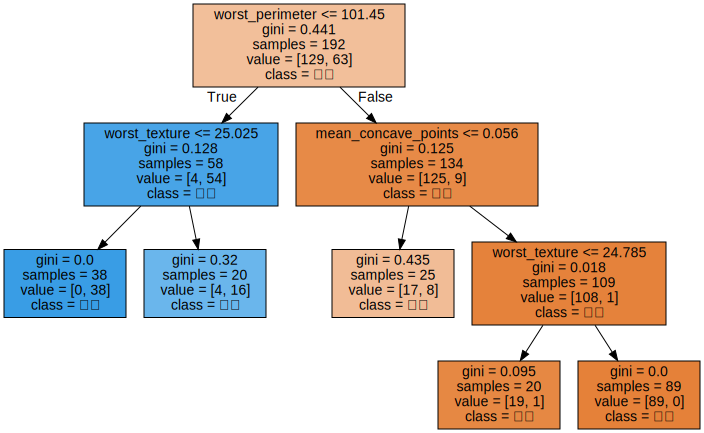

In [29]:
# 나무구조 시각화(Graphviz)
v_feature_name = df_train_x.columns

# 모델의 시각화
export_graphviz(tree_final, out_file="tree_final.dot", class_names = ['음성', '양성'],
               feature_names = v_feature_name, impurity = True, filled = True)

with open("tree_final.dot") as f:
    dot_graph = f.read()
display(graphviz.Source(dot_graph))

##### Model 평가

In [30]:
y_pred = tree_final.predict(df_test_x)
print("Accuracy: {0:.3f}\n".format(tree_final.score(df_test_x,df_test_y)))
print("Confusion matrix: \n{0}".format(confusion_matrix(df_test_y, y_pred)))
print(classification_report(df_test_y, y_pred, digits=3))

Accuracy: 0.898

Confusion matrix: 
[[79  4]
 [ 9 36]]
              precision    recall  f1-score   support

           0      0.898     0.952     0.924        83
           1      0.900     0.800     0.847        45

    accuracy                          0.898       128
   macro avg      0.899     0.876     0.886       128
weighted avg      0.899     0.898     0.897       128



* "1" 기준으로 F1 Score는 46.9%
> precision은 높으나 recall이 매우 낮음

### Random Forest

#### 일반 모델 생성

In [31]:
rf_normal = RandomForestClassifier(random_state = random)
rf_normal.fit(df_train_x, df_train_y)

# train 정확도
print("Accuracy on train set : {:.3f}".format(tree_normal.score(df_train_x, df_train_y)))
# test 정확도
print("Accuracy on test set : {:.3f}".format(tree_normal.score(df_test_x, df_test_y)))

Accuracy on train set : 1.000
Accuracy on test set : 0.930


* Model의 정확도는 Train 100%, Test 93.0%로 현재 Train data에 Overfitting 되어 있다.

#### 파라미터 조정

##### Tree 수의 변경

In [32]:
train_acc = []
test_acc = []

n_estimators = [n_estimators * 10 for n_estimators in range(1,20)]

for v_n_tree in n_estimators:
    rf_n_tree = RandomForestClassifier(random_state = random, n_estimators = v_n_tree)
    rf_n_tree.fit(df_train_x, df_train_y)
    train_acc.append(rf_n_tree.score(df_train_x, df_train_y))
    test_acc.append(rf_n_tree.score(df_test_x, df_test_y))

# 결과 저장
rf_acc_n_tree = pd.DataFrame()
rf_acc_n_tree["MinSampleLeaf"] = n_estimators
rf_acc_n_tree["TrainScore"] = train_acc
rf_acc_n_tree["TestScore"] = test_acc

In [33]:
rf_acc_n_tree.round(3)

,MinSampleLeaf,TrainScore,TestScore
0,10,1.0,0.906
1,20,1.0,0.930
2,30,1.0,0.930
3,40,1.0,0.930
4,50,1.0,0.938
5,60,1.0,0.930
6,70,1.0,0.930
7,80,1.0,0.930
8,90,1.0,0.930
9,100,1.0,0.938


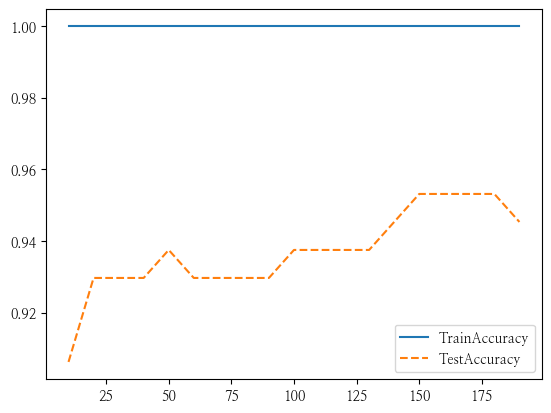

In [34]:
# 그래프
plt.plot(n_estimators, train_acc, linestyle = "-", label = "TrainAccuracy")
plt.plot(n_estimators, test_acc, linestyle = "--", label = "TestAccuracy")
plt.legend()

* Train Data는 정확도 100%로 과적합 되어있다.  
* Test Data의 정확도는 Tree의 수가 150까지는 증가하지만, 175 이후로 감소하고 있다.

##### oob error 변화

In [35]:
oob_error = []
for v_n_tree in range(1,181):
    rf = RandomForestClassifier(random_state = random, n_estimators = v_n_tree, oob_score = True)
    rf.fit(df_train_x, df_train_y)
    oob_error.append(1 - rf.oob_score_)

Text(0.5, 0, 'n_estimators')

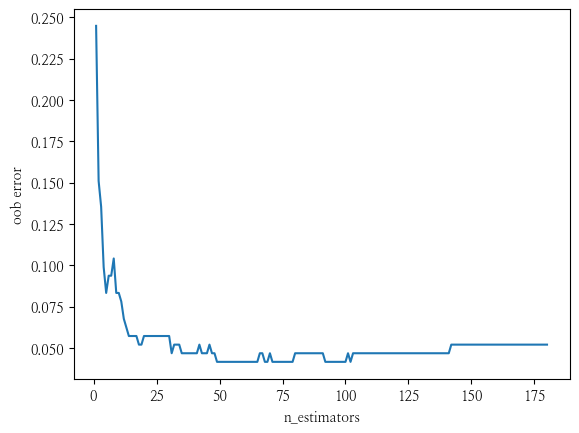

In [36]:
plt.plot(range(1,181), oob_error)
plt.ylabel("oob error")
plt.xlabel("n_estimators")

In [37]:
# Tree 수 지정
n_tree = 150

* 트리 수를 150으로 지정한 이유?
> Test Accuracy의 정확도는 트리 수가 150~170 사이에서 가장 뛰어나다.  
> 그러나, obb error가 가장 작은 지역이 트리 수가 100 근처이다.  
> Data의 분석 목적은 유방암 판정을 위한 종양의 특성을 확인하는 것으로,   
의료 목적 상 정확도가 뛰어나야 하기 때문에 트리 수를 150으로 설정하였다.

##### Max Depth

In [38]:
train_acc = []
test_acc = []

para_depth = [depth for depth in range(1,11)]

for v_max_depth in para_depth:
    rf_max_depth = RandomForestClassifier(random_state = random, max_depth = v_max_depth, n_estimators = n_tree)
    rf_max_depth.fit(df_train_x, df_train_y)
    train_acc.append(rf_max_depth.score(df_train_x, df_train_y))
    test_acc.append(rf_max_depth.score(df_test_x, df_test_y))

# 결과 저장
rf_acc_max_depth = pd.DataFrame()
rf_acc_max_depth["MinSampleLeaf"] = para_depth
rf_acc_max_depth["TrainScore"] = train_acc
rf_acc_max_depth["TestScore"] = test_acc

In [39]:
rf_acc_max_depth.round(3)

,MinSampleLeaf,TrainScore,TestScore
0,1,0.943,0.898
1,2,0.953,0.922
2,3,0.979,0.938
3,4,0.995,0.938
4,5,1.000,0.945
5,6,1.000,0.953
6,7,1.000,0.953
7,8,1.000,0.953
8,9,1.000,0.953
9,10,1.000,0.953


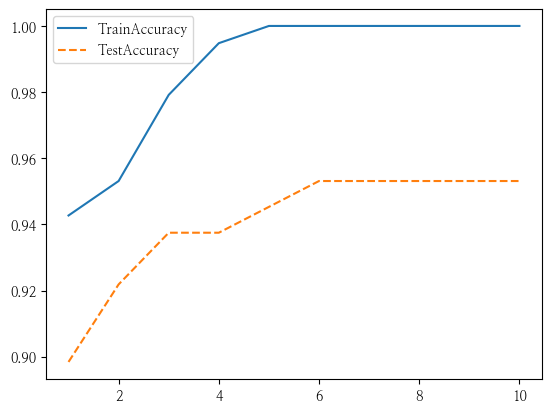

In [40]:
# 그래프
plt.plot(para_depth, train_acc, linestyle = "-", label = "TrainAccuracy")
plt.plot(para_depth, test_acc, linestyle = "--", label = "TestAccuracy")
plt.legend()

* Tree의 Max_depth  
> Tree의 깊이가 증가할수록 Train과 Test의 정확도가 증가하다가, 
Depth가 6이상에서 Train Data는 과적합, Test Data는 0.953으로 일정하게 유지되고 있다.

In [41]:
# Max_depth 설정
max_depth = 6

##### Min_Samples_Split

In [42]:
train_acc = []
test_acc = []

para_split = [n_split * 10 for n_split in range(2,11)]

for v_para_split in para_split:
    rf_split = RandomForestClassifier(n_estimators = n_tree, random_state = random, 
                                      max_depth = max_depth , min_samples_split = v_para_split)
    rf_split.fit(df_train_x, df_train_y)
    train_acc.append(rf_split.score(df_train_x, df_train_y))
    test_acc.append(rf_split.score(df_test_x, df_test_y))

# 결과 저장
rf_acc_split = pd.DataFrame()
rf_acc_split["MinSampleLeaf"] = para_split
rf_acc_split["TrainScore"] = train_acc
rf_acc_split["TestScore"] = test_acc

In [43]:
rf_acc_split.round(3)

,MinSampleLeaf,TrainScore,TestScore
0,20,0.969,0.930
1,30,0.969,0.922
2,40,0.953,0.914
3,50,0.958,0.914
4,60,0.958,0.914
5,70,0.953,0.914
6,80,0.948,0.914
7,90,0.948,0.898
8,100,0.943,0.898


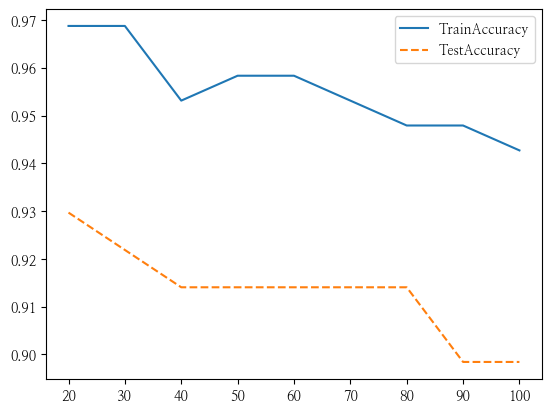

In [44]:
# 그래프
plt.plot(para_split, train_acc, linestyle = "-", label = "TrainAccuracy")
plt.plot(para_split, test_acc, linestyle = "--", label = "TestAccuracy")
plt.legend()

* Split Node의 최소 수 설정
> Test Accuracy가 높아야 한다는 관점에서는 Split Node의 최소 수를 20으로 설정해야 한다.  
> 최종 Model의 일반화를 고려한다면, Split Node의 최소 수를 60으로 설정해야 한다.  
> 정확도 96.9%와 95.8%는 큰 차이가 없다고 판단하였고,  
Split Node의 최소 수를 60으로 설정하였다.

In [45]:
n_split = 60

In [46]:
train_acc = []
test_acc = []

para_leaf = [n_leaf * 2 for n_leaf in range(1,16)]

for v_para_leaf in para_leaf:
    rf_leaf = RandomForestClassifier(random_state = random, max_depth = max_depth , 
                                       min_samples_split = n_split, min_samples_leaf = v_para_leaf)
    rf_leaf.fit(df_train_x, df_train_y)
    train_acc.append(rf_leaf.score(df_train_x, df_train_y))
    test_acc.append(rf_leaf.score(df_test_x, df_test_y))

# 결과 저장
rf_acc_leaf = pd.DataFrame()
rf_acc_leaf["MinSampleLeaf"] = para_leaf
rf_acc_leaf["TrainScore"] = train_acc
rf_acc_leaf["TestScore"] = test_acc

In [47]:
rf_acc_leaf.round(3)

,MinSampleLeaf,TrainScore,TestScore
0,2,0.948,0.914
1,4,0.943,0.914
2,6,0.948,0.914
3,8,0.943,0.906
4,10,0.943,0.906
5,12,0.943,0.906
6,14,0.943,0.906
7,16,0.943,0.906
8,18,0.948,0.906
9,20,0.948,0.898


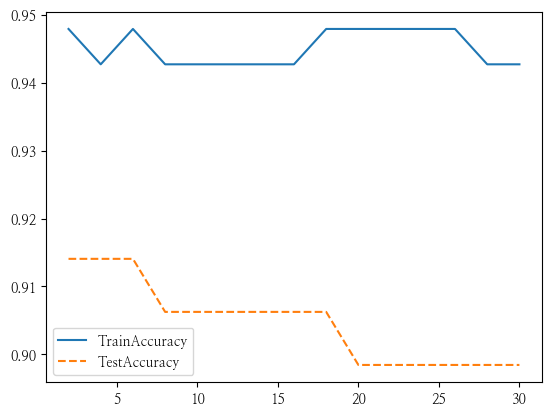

In [48]:
# 그래프
plt.plot(para_leaf, train_acc, linestyle = "-", label = "TrainAccuracy")
plt.plot(para_leaf, test_acc, linestyle = "--", label = "TestAccuracy")
plt.legend()

* Leaf의 최소 Sample 수 설정  
> 최종 Model의 일반성을 고려한다면 10이상으로 설정해야 할 것이다.  
> 최소 Sampel 수가 8부터 18까지는 Test Accuracy가 0.906으로 일정하게 유지되고 있다.  
> Model의 성능과 일반성을 모두 고려하여 Leaf 최소 Sample 수를 18로 설정하였다.

#### Model 선정 및 성능 평가(정확성 및 일반화)

In [49]:
rf_final = RandomForestClassifier(random_state = 100, min_samples_leaf = 18, 
                                   min_samples_split = 60, max_depth = 6)
rf_final.fit(df_train_x, df_train_y)

RandomForestClassifier(max_depth=6, min_samples_leaf=18, min_samples_split=60,
                       random_state=100)

In [50]:
print("Score_train : {0}".format(rf_final.score(df_train_x, df_train_y)))
print("Score_test : {0}".format(rf_final.score(df_test_x, df_test_y)))

Score_train : 0.9479166666666666
Score_test : 0.90625


## 결론 도출

### Decision Tree

#### Feature Importance

In [51]:
df_importance = pd.DataFrame()
df_importance["Feature"] = v_feature_name
df_importance["importance"] = tree_final.feature_importances_

In [52]:
# Importance 별로 정렬
df_importance.sort_values('importance', ascending = False, inplace = True)
df_importance.round(3)

,Feature,importance
22,worst_perimeter,0.923
7,mean_concave_points,0.060
21,worst_texture,0.017
0,mean_radius,0.000
16,concavity_error,0.000
28,worst_symmetry,0.000
27,worst_concave_points,0.000
26,worst_concavity,0.000
25,worst_compactness,0.000
24,worst_smoothness,0.000


#### Feature Importance Result

Text(0, 0.5, '변수')

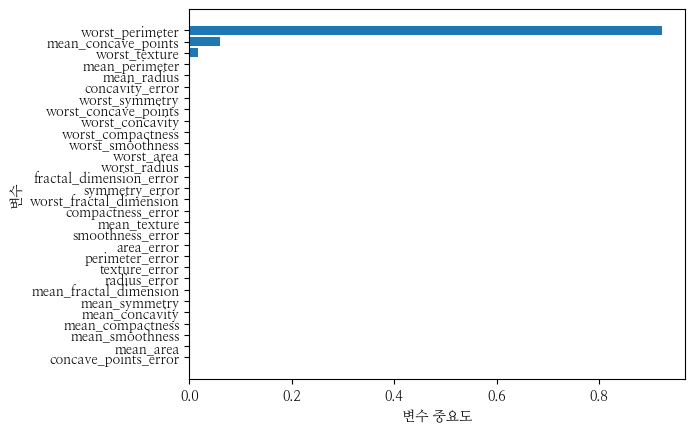

In [53]:
# 그래프 도식화
df_importance.sort_values('importance', ascending = True, inplace = True)
coordinates = range(len(df_importance))
plt.barh(y = coordinates, width = df_importance['importance'])
plt.yticks(coordinates, df_importance['Feature'])
plt.xlabel("변수 중요도")
plt.ylabel("변수")

* 중요 설명변수 : 트리 생성 시 000, 000 순으로 영향이 크다고 해석할 수 있다.  


* 단, 계산된 변수 중요도 값이 낮거나 0이더라도 선택되는 Train Data에 따라 중요도는 변경될 수 있다.  

#### 최종 Model 생성

In [54]:
# Data 불러오기
df_raw = df_raw.replace('양성', 1)
df_raw = df_raw.replace('음성', 0)
df_raw_x = df_raw.drop("diagnosis", axis = 1, inplace = False)
df_raw_y = df_raw["diagnosis"]
# Vital Feature 선별
df_dt_x1 = df_raw_x['worst_perimeter']
df_dt_x2 = df_raw_x['mean_concave_points']
df_dt_x = pd.concat([df_dt_x1,df_dt_x2], axis = 1)
# Data Split
df_train_x_f, df_test_x_f, df_train_y_f, df_test_y_f = train_test_split(df_dt_x, df_raw_y, test_size = 0.4, random_state = random)

In [55]:
# Model Predict
dt_finally = DecisionTreeClassifier(random_state = 100, min_samples_leaf = 20, min_samples_split = 60, max_depth = 5)
dt_finally.fit(df_train_x_f,df_train_y_f)
y_pred_dt = dt_finally.predict(df_test_x_f)
print("Accuracy: {0:.3f}\n".format(dt_finally.score(df_test_x_f,df_test_y_f)))
print("Confusion matrix: \n{0}".format(confusion_matrix(df_test_y_f, y_pred_dt)))
print(classification_report(df_test_y_f, y_pred_dt, digits=3))

Accuracy: 0.898

Confusion matrix: 
[[79  4]
 [ 9 36]]
              precision    recall  f1-score   support

           0      0.898     0.952     0.924        83
           1      0.900     0.800     0.847        45

    accuracy                          0.898       128
   macro avg      0.899     0.876     0.886       128
weighted avg      0.899     0.898     0.897       128



### RandomForset

#### Feature Importance

In [56]:
rf_importance = pd.DataFrame()
rf_importance["Feature"] = v_feature_name
rf_importance["importance"] = rf_final.feature_importances_

In [57]:
# Importance 별로 정렬
rf_importance.sort_values('importance', ascending = False, inplace = True)
rf_importance.round(3)

,Feature,importance
23,worst_area,0.173
22,worst_perimeter,0.142
20,worst_radius,0.111
7,mean_concave_points,0.099
0,mean_radius,0.079
26,worst_concavity,0.071
27,worst_concave_points,0.066
2,mean_perimeter,0.061
6,mean_concavity,0.049
3,mean_area,0.042


#### Feature Importance Result

Text(0, 0.5, '변수')

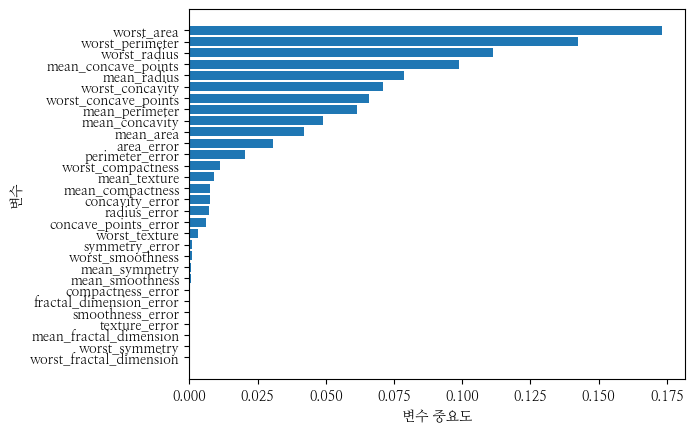

In [58]:
# 그래프 도식화
rf_importance.sort_values('importance', ascending = True, inplace = True)
coordinates = range(len(df_importance))
plt.barh(y = coordinates, width = rf_importance['importance'])
plt.yticks(coordinates, rf_importance['Feature'])
plt.xlabel("변수 중요도")
plt.ylabel("변수")

#### 최종 Model 생성

In [59]:
# Data 불러오기
df_raw = df_raw.replace('양성', 1)
df_raw = df_raw.replace('음성', 0)
df_raw_x = df_raw.drop("diagnosis", axis = 1, inplace = False)
df_raw_y = df_raw["diagnosis"]
# Vital Feature 선별
df_rf_x1 = df_raw_x['worst_area']
df_rf_x2 = df_raw_x['worst_perimeter']
df_rf_x3 = df_raw_x['worst_radius']
df_rf_x4 = df_raw_x['mean_concave_points']
df_rf_x5 = df_raw_x['mean_radius']
df_rf_x = pd.concat([df_rf_x1,df_rf_x2,df_rf_x3,df_rf_x4,df_rf_x5], axis = 1)
# Data Split
df_train_x_r, df_test_x_r, df_train_y_r, df_test_y_r = train_test_split(df_rf_x, df_raw_y, test_size = 0.4, random_state = random)

In [60]:
# Model Predict
rf_finally = RandomForestClassifier(random_state = 100, min_samples_leaf = 18, min_samples_split = 60, max_depth = 6, n_estimators = 150)
rf_finally.fit(df_train_x_r,df_train_y_r)
y_pred_rf = rf_finally.predict(df_test_x_r)
print("Accuracy: {0:.3f}\n".format(rf_finally.score(df_test_x_r,df_test_y_r)))
print("Confusion matrix: \n{0}".format(confusion_matrix(df_test_y_r, y_pred_rf)))
print(classification_report(df_test_y_r, y_pred_rf, digits=3))

Accuracy: 0.906

Confusion matrix: 
[[79  4]
 [ 8 37]]
              precision    recall  f1-score   support

           0      0.908     0.952     0.929        83
           1      0.902     0.822     0.860        45

    accuracy                          0.906       128
   macro avg      0.905     0.887     0.895       128
weighted avg      0.906     0.906     0.905       128

